In [13]:
import numpy as np
from scipy.special import ellipk, ellipe, elliprf, elliprj
import matplotlib.pyplot as plt

def ellippi(n, m):
  return elliprf(                                                                                                                                                                                        
        0., 1. - m, 1.) + (n / 3.) * elliprj(0., 1. - m, 1., 1. - n)

127462.12377065387 0.3885585585585586 160.2303334262097


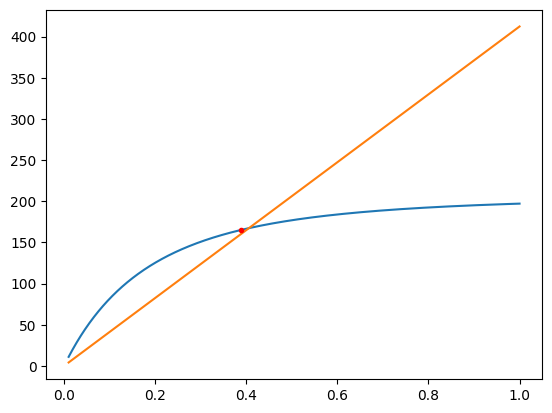

In [65]:
a = 0.3
r = 0.08
l = np.linspace(0.01, 1, 1000)
#N = l/4.85e-3 * 2

n = 4 * a * r/(r + a)**2
m = 4 * r * a/((r + a)**2 + l**2/4)

k = (1/m * (ellipk(m) - ellipe(m)) + (1-n)/n * (ellipk(m) - ellippi(n,m))) * l * np.sqrt(a * r * m)/(np.pi * r**2)

DIDT = []
NN = []
L = []
V = 0.12

vmax = 500
imax = 1e3
R = 3.3e-3
mu = 4e-7 * np.pi

N = vmax/(2 * np.pi) * 1/(R * r * imax + V/k)
didt = 2 * V * l/(mu * r**2 * N * k)
idx = np.argmin(didt)

plt.plot(l, N)
plt.plot(l, l/4.85e-3 * 2)
plt.plot(l[idx], N[idx], 'r.')

print(didt[idx], l[idx], l[idx]/4.85e-3 * 2)

[[0.1 0.1]
 [0.6 0.1]
 [0.6 0.7]
 [0.1 0.7]]


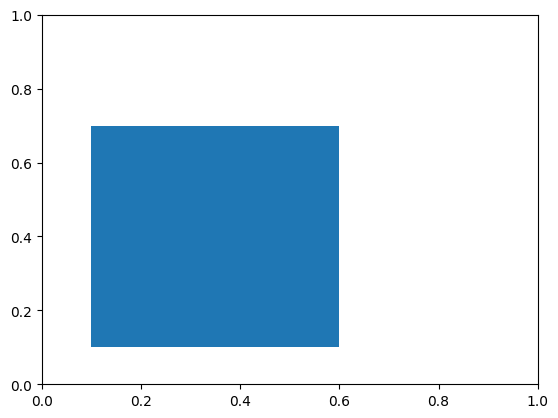

In [11]:
import matplotlib.pyplot as plt
from matplotlib import patches

ax = plt.subplot()
rect = patches.Rectangle((0.1, 0.1), 0.5, 0.6)
ax.add_patch(rect)

print(rect.get_corners())
plt.show()